In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#타이타닉 호 승객 생존 예측 프로젝트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv("titanic_processedData.csv")

In [3]:
#데이터 X와 정답 y
#X [선실등급, 성별, 나이, 부부형제 수, 부모자식 수, 운임]
x_cols = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']
X = df[x_cols].values
X

array([[  1.    ,   1.    ,  29.    ,   0.    ,   0.    , 211.3375],
       [  1.    ,   0.    ,   0.9167,   1.    ,   2.    , 151.55  ],
       [  1.    ,   1.    ,   2.    ,   1.    ,   2.    , 151.55  ],
       ...,
       [  3.    ,   0.    ,  26.5   ,   0.    ,   0.    ,   7.225 ],
       [  3.    ,   0.    ,  27.    ,   0.    ,   0.    ,   7.225 ],
       [  3.    ,   0.    ,  29.    ,   0.    ,   0.    ,   7.875 ]])

In [4]:
# y
y = df['survived'].values
y

#데이터 전처리 완료

array([1, 1, 0, ..., 0, 0, 0])

### ML 코딩 5단계
#### 1. 훈련 데이터와 테스트 데이터 준비 : train_test_split
#### 2. ML 알고리즘 선택
#### 3. 훈련 (under fitting, over fitting 조심) : fit
#### 4. 평가 : score
#### 5. 새 데이터로 예측 : predict

In [5]:
#1. 훈련 데이터와 테스트 데이터 준비
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7)
#random_state seed값 고정 시킴

In [6]:
#2. ML 알고리즘 선택
#ensemble: 다수결 원칙 적용 모델 현재 가장 많이 씀 linear_model: 선형 모델 (데이터들이 일정 직선 상에 모여있을 때)
#naive_bayes: 확률 기반 모델 neighbors: 어떤 값과 인접한 값과 관계 (k-최근접 이웃)
#neural_network -> 발전 -> DL
#svm: Support Vector Machine / tree: 의사결정트리 / ensemble > random forest: 의사 결정 트리 가지고 다수결로 결정
from sklearn.tree import DecisionTreeClassifier #classifier: 분류 0 1 regressor: 회귀 값이 나옴
tree = DecisionTreeClassifier()

In [7]:
#3. 훈련
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [8]:
#4. 평가
print('훈련 점수:', tree.score(X_train, y_train))
print('테스트 점수:', tree.score(X_test, y_test))

훈련 점수: 0.9719626168224299
테스트 점수: 0.7709923664122137


In [9]:
tree = DecisionTreeClassifier(max_depth=6)
#max_depth: 학습 층 이걸 조절해서 최적 점수를 찾는 것을 hyperparameter tunning
tree.fit(X_train, y_train)
print('훈련 점수:', tree.score(X_train, y_train))
print('테스트 점수:', tree.score(X_test, y_test))

훈련 점수: 0.8394222599830077
테스트 점수: 0.8320610687022901


In [10]:
#5. 예측
#디카프리오는 살 수 있었나? 3등실, 남자, 19살, 형제 X, 부모 0, 운임: 10달러 [[3, 0, 19, 0, 0, 10]]
#훈련할 때 2차원 데이터를 사용했기 때문에 예측할 때도 2차원 데이터를 넣어주어야 함.
dicaprio = [[3, 0, 19, 0, 0, 10]]
result = tree.predict(dicaprio)
print('결과:',result)
pct = tree.predict_proba(dicaprio)
print(f'생존확률:{pct[0][1]*100:.2f}%')

결과: [0]
생존확률:11.06%


In [11]:
#설명 가능한 인공지능 : XAI
from sklearn.tree import plot_tree

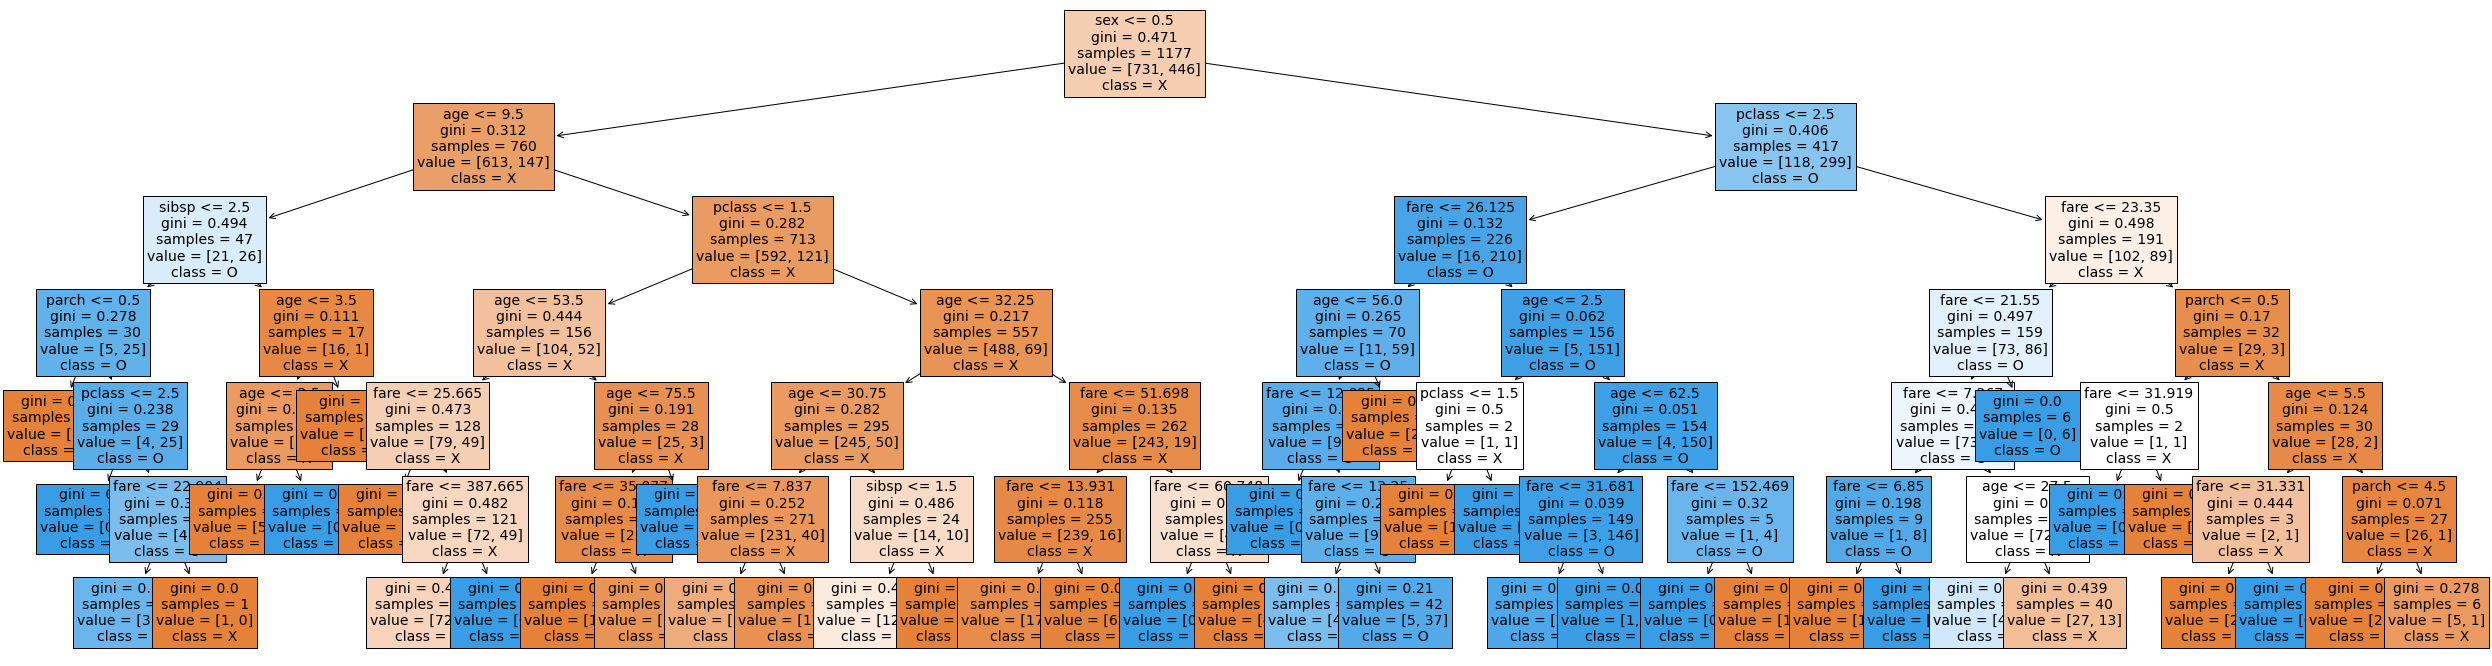

In [12]:
plt.figure(figsize=(44,12))
plot_tree(tree, feature_names=x_cols, class_names=['X', 'O'], filled=True, fontsize=14)
plt.savefig('tree1.png')
plt.show()